<a href="https://colab.research.google.com/github/mariel0503/aprendizaje-automatico-252601/blob/main/4_4_M%C3%A9todos_de_clustering_basados_en_particiones_V3_Milan_Mariel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3.**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


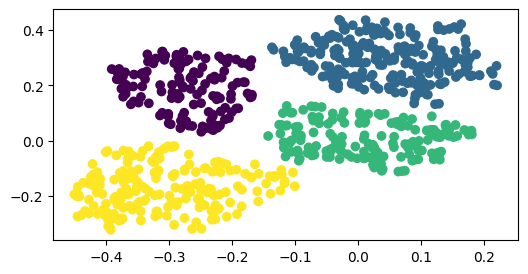

In [3]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [8]:
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  cDx = Dx[np.random.choice(Dx.shape[0], K, replace=False),:]## P1. Tu código aquí ##
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[-0.241692  -0.0986583]
 [-0.0691089 -0.0504167]
 [-0.104204   0.101431 ]
 [ 0.177914   0.232903 ]]


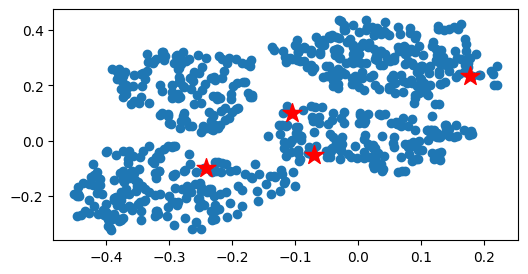

In [9]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [10]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i,:], cDx)## P2. Tu código aquí ##

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

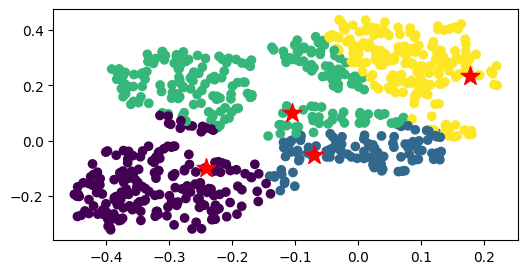

In [11]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [12]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = (Dyp == k)## P3. Tu código aquí ##

      Dx_k = Dx[indices_elementos_k]

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.

      mat = np.linalg.norm(
            Dx_k[:, np.newaxis, :] - Dx_k[np.newaxis, :, :],
            axis=2
        ) ## P4. Tu código aquí ##

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
      # el mínimo de un vector y nos devuelve su índice).

      ic =np.where(Dyp==k)[0][np.argmin(np.sum(mat, axis=1))]

      # Asignamos como centro del cluster al elemento del cluster que ofrece
      # la menor distancia con respecto a todos los demás
      cDx[k,:] = Dx[ic, :] ## P5. Tu código aquí ##
  return cDx

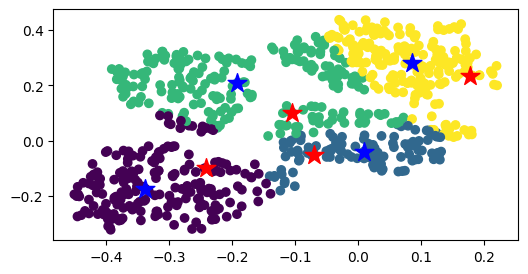

In [13]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [14]:
def MyKMedoide(Dx, K):
  idx = np.random.choice(Dx.shape[0], K, replace=False)
  cDx =  Dx[idx, :] ## P6. Tu código aquí ##
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    distancias = np.linalg.norm(
            Dx[:, np.newaxis, :] - cDx[np.newaxis, :, :],
            axis=2
        )
    Dyp = np.argmin(distancias, axis=1) ## P7. Tu código aquí ##
    # Calcular los nuevos centros
    cDx =   paso3_actualiza_medoides(Dx, cDx, Dyp, K) ## P8. Tu código aquí ##
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

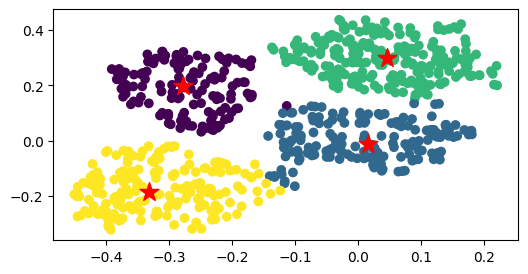

In [15]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


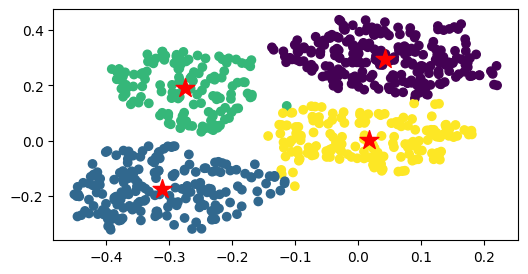

In [16]:
from sklearn.cluster import KMeans

modelo = KMeans(4)
modelo.fit(Dx)
modelo.predict(Dx)
Dyp_sk = modelo.labels_  ## P9.1 Tu código aquí ##
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_  ## P9.2 Tu código aquí ##

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [19]:
def medida_R_cuadrado(X, Xyp, cXs):
    centro_global = np.mean(X, axis=0)
    SST = np.sum(np.sum((X - centro_global)**2, axis=1))

    SSE = 0
    for i in range(len(X)):
        cluster_label = int(Xyp[i])
        centroide = cXs[cluster_label]
        SSE += np.sum((X[i] - centroide)**2)

    if SST == 0:
        return 1.0
    return 1 - (SSE / SST)


In [21]:
def calcular_inercia(X, labels, centros):
    inercia = 0
    for i, centro in enumerate(centros):
        puntos_cluster = X[labels == i]
        if len(puntos_cluster) > 0:
            distancias = np.sum((puntos_cluster - centro) ** 2, axis=1)
            inercia += np.sum(distancias)
    return inercia


In [22]:
 ## P10. Tu código aquí ##
from sklearn.metrics import silhouette_score

# --- K-Means++ ---
sil_kmeans = silhouette_score(Dx, Dyp_sk)
iner_kmeans = modelo.inertia_
r2_kmeans = medida_R_cuadrado(Dx, Dyp_sk, cDx_sk)

# --- K-Medoids ---
sil_kmedoids = silhouette_score(Dx, Dyp)
iner_kmedoids = calcular_inercia(Dx, Dyp, cDx)
r2_kmedoids = medida_R_cuadrado(Dx, Dyp, cDx)

print("K-Means++")
print("Silueta:", sil_kmeans)
print("Inercia:", iner_kmeans)
print("R2:", r2_kmeans)

print("\nK-Medoids")
print("Silueta:", sil_kmedoids)
print("Inercia:", iner_kmedoids)
print("R2:", r2_kmedoids)



K-Means++
Silueta: 0.5361642035334295
Inercia: 8.898199937288389
R2: 0.8412500621417998

K-Medoids
Silueta: 0.536069406534725
Inercia: 9.01698741794774
R2: 0.8391308127086667


 Observando las métricas calculadas, se puede concluir que K-Means++ agrupa ligeramente mejor los datos que K-Medoids para este conjunto de datos. El coeficiente de silueta de K-Means++ (0.5362) es marginalmente superior al de K-Medoids (0.5361), lo que indica una mejor cohesión interna y separación entre clústeres. Asimismo, la inercia es menor en K-Means++ (8.90 frente a 9.02), lo que refleja que los puntos están, en promedio, más cercanos a sus centroides. Finalmente, el valor de R² es más alto en K-Means++ (0.84 frente a 0.84), indicando que este modelo explica una mayor proporción de la variabilidad de los datos. En conjunto, aunque ambos algoritmos presentan desempeños muy similares, K-Means++ muestra una ligera ventaja, por lo que resulta la opción más adecuada para este dataset.

### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


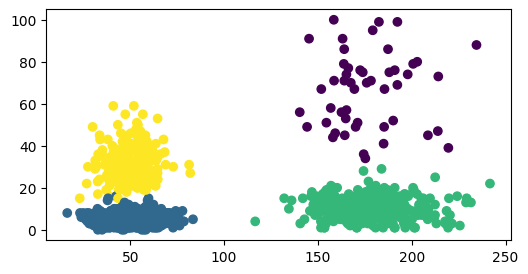

In [23]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

In [24]:
 ## aplica kMeans ++
 ## P11. Tu código aquí ##

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- K-Means++ ---
modelo_kmeans = KMeans(n_clusters=4, random_state=42)
modelo_kmeans.fit(Dx)

Dyp_kmeans = modelo_kmeans.predict(Dx)
cDx_kmeans = modelo_kmeans.cluster_centers_

sil_kmeans = silhouette_score(Dx, Dyp_kmeans)
iner_kmeans = modelo_kmeans.inertia_
r2_kmeans = medida_R_cuadrado(Dx, Dyp_kmeans, cDx_kmeans)

print("K-Means++")
print("Silueta:", sil_kmeans)
print("Inercia:", iner_kmeans)
print("R2:", r2_kmeans)


K-Means++
Silueta: 0.5430325168151632
Inercia: 389766.7090087675
R2: 0.9336661117209318


Text(0.5, 1.0, 'K-Means++ (k = 4)')

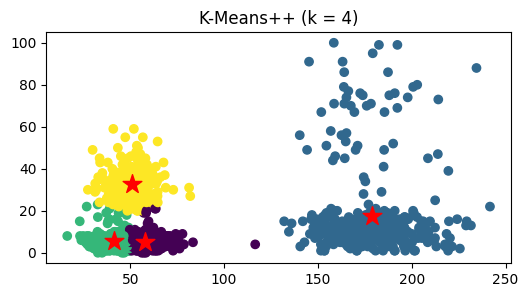

In [30]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_kmeans)
ax.scatter(cDx_kmeans[:,0], cDx_kmeans[:,1],
           marker='*', s=200, c='red')
ax.set_title("K-Means++ (k = 4)")


In [29]:
## aplica kMedoide
## P12. Tu código aquí ##
# --- K-Medoids ---
cDx_kmedoids, Dyp_kmedoids = MyKMedoide(Dx, 4)

sil_kmedoids = silhouette_score(Dx, Dyp_kmedoids)
iner_kmedoids = calcular_inercia(Dx, Dyp_kmedoids, cDx_kmedoids)
r2_kmedoids = medida_R_cuadrado(Dx, Dyp_kmedoids, cDx_kmedoids)

print("\nK-Medoids")
print("Silueta:", sil_kmedoids)
print("Inercia:", iner_kmedoids)
print("R2:", r2_kmedoids)





K-Medoids
Silueta: 0.5432490160412867
Inercia: 403183.3911
R2: 0.9313827440798652


Text(0.5, 1.0, 'K-Medoids (k = 4)')

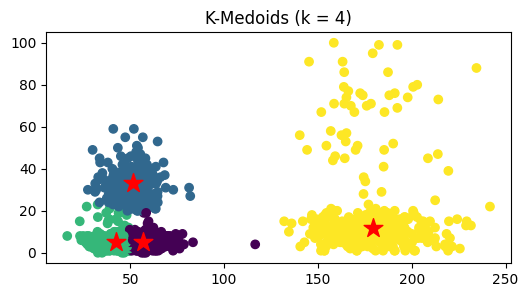

In [31]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_kmedoids)
ax.scatter(cDx_kmedoids[:,0], cDx_kmedoids[:,1],
           marker='*', s=200, c='red')
ax.set_title("K-Medoids (k = 4)")


Conclusion

Con base en los resultados obtenidos para el dataset de diferente densidad, se observa que ambos algoritmos presentan un desempeño muy similar, lo que indica que los dos logran capturar adecuadamente la estructura general de los datos. El coeficiente de silueta es prácticamente igual en ambos casos, aunque K-Medoids obtiene un valor ligeramente superior, lo que sugiere una separación y cohesión de clústeres apenas mejor. Por otro lado, K-Means++ presenta una menor inercia y un valor de R² ligeramente más alto, indicando clústeres algo más compactos y una mayor proporción de la variabilidad explicada. En conjunto, K-Means++ puede considerarse marginalmente superior desde el punto de vista de compactación y varianza explicada, mientras que K-Medoids muestra una leve ventaja en la calidad de separación, por lo que la elección entre ambos depende del criterio prioritario: eficiencia y compactación (K-Means++) o mayor robustez en la asignación de clústeres (K-Medoids).

# 🚀 ¡TALLER FINALIZADO!"